In [21]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Membaca dataset
data = pd.read_csv('OYO_HOTEL_ROOMS.csv')

In [22]:
# Menampilkan informasi dasar tentang dataset
print("Informasi dataset sebelum klastering:")
print(data.info())

Informasi dataset sebelum klastering:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  460 non-null    int64  
 1   Hotel_name  460 non-null    object 
 2   Location    460 non-null    object 
 3   Price       460 non-null    float64
 4   Discount    418 non-null    object 
 5   Rating      460 non-null    float64
 6   cluster     460 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 25.3+ KB
None


In [23]:
# Mengisi nilai yang hilang dengan rata-rata
data = data.fillna(data.mean())

C:\Users\ASUS M409DA\AppData\Local\Temp\ipykernel_432\145701412.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


In [15]:
# Memilih fitur yang akan digunakan untuk klastering
features = data[['Price', 'Rating']]

In [16]:
# Standarisasi fitur
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

In [24]:

# Membangun model klastering AHC
ahc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [25]:
# Melakukan klastering
clusters = ahc.fit_predict(data_scaled)

C:\Users\ASUS M409DA\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [19]:

# Menambahkan kolom klaster ke dataset
data['cluster'] = clusters

In [26]:
# Menampilkan informasi dataset setelah klastering
print("\nInformasi dataset setelah klastering:")
print(data.info())


Informasi dataset setelah klastering:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  460 non-null    int64  
 1   Hotel_name  460 non-null    object 
 2   Location    460 non-null    object 
 3   Price       460 non-null    float64
 4   Discount    418 non-null    object 
 5   Rating      460 non-null    float64
 6   cluster     460 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 25.3+ KB
None


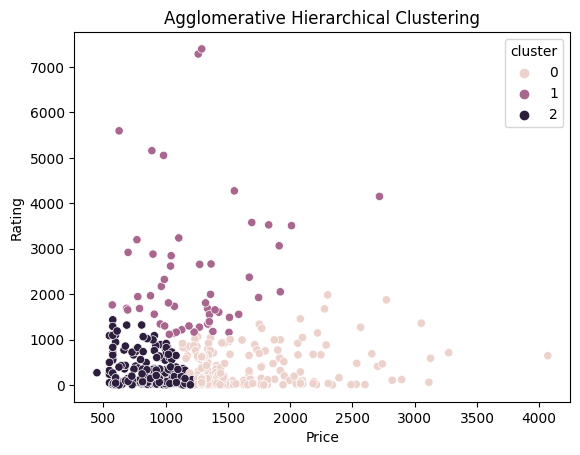

In [27]:
# Visualisasi hasil klastering
sns.scatterplot(data=data, x='Price', y='Rating', hue='cluster')
plt.title('Agglomerative Hierarchical Clustering')
plt.show()